In [ ]:
#Notes
#create visualization of data using matplot
#vary number of shots and plot accuracy as function of shots
#use different feature maps, z feature map and pauli feature map
#change number of repetitions
#type of entanglement linear or full (when dim = 2, same effect)
# https://www.kaggle.com/fengdanye/machine-learning-4-support-vector-machine


In [1]:
#import qiskit libaries
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap, ZFeatureMap, PauliFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

seed = 10599
aqua_globals.random_seed = seed
data = np.genfromtxt("COVIDdata.tsv")

In [3]:
# divide data into UNSAFE & SAFE data points for plotting
UNSAFEx = []
UNSAFEy = []
SAFEx = []
SAFEy = []

#divide data into training and testing sets for ML
training_input = {
    "UNSAFE" : [],
    "SAFE" : []
}
for i in range(45):
    if (data[i][2]==1):
        training_input["SAFE"].append([data[i][0], data[i][1]])
        SAFEx.append(data[i][0])
        SAFEy.append(data[i][1])
    else:
        training_input["UNSAFE"].append([data[i][0], data[i][1]])
        UNSAFEx.append(data[i][0])
        UNSAFEy.append(data[i][1])

test_input = {
    "UNSAFE" : [],
    "SAFE" : []
}
for i in range(45,59):
    if (data[i][2]==1):
        test_input["SAFE"].append([data[i][0], data[i][1]])
        SAFEx.append(data[i][0])
        SAFEy.append(data[i][1])
    else:
        test_input["UNSAFE"].append([data[i][0], data[i][1]])
        UNSAFEx.append(data[i][0])
        UNSAFEy.append(data[i][1])
class_labels = ["SAFE", "UNSAFE"]

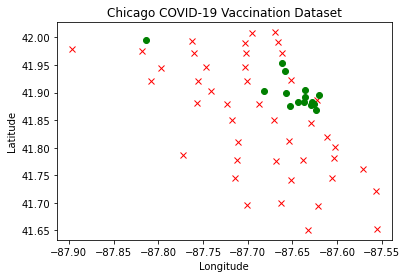

In [5]:
# plot dataset UNSAFE vs SAFE
plt.plot(UNSAFEx, UNSAFEy, 'rx')
plt.plot(SAFEx, SAFEy, 'go')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Chicago COVID-19 Vaccination Dataset")
plt.savefig('COVIDdataset.png')

In [5]:
#Second order Pauli Z feature map
feature_map = ZZFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)
backend = BasicAer.get_backend('qasm_simulator')
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


In [7]:
test_input

{'UNSAFE': [[-87.761826, 41.993931],
  [-87.662381, 41.700445],
  [-87.621537, 41.694192],
  [-87.722735, 41.879417],
  [-87.653382, 41.812017],
  [-87.633087, 41.650765],
  [-87.75531, 41.920609],
  [-87.711251, 41.810038],
  [-87.817934, 41.974566],
  [-87.651656, 41.740873],
  [-87.714238, 41.745398],
  [-87.629531, 41.844869]],
 'SAFE': [[-87.644283, 41.882786], [-87.623449, 41.867824]]}

In [8]:
#first order Pauli Z feature map
feature_map = ZFeatureMap(feature_dimension=2, reps = 2)
qsvm = QSVM(feature_map, training_input, test_input)
backend = BasicAer.get_backend('qasm_simulator')

In [10]:
#Pauli Feature Map
feature_map = PauliFeatureMap(feature_dimension=2, reps=2, entanglement='linear')
qsvm = QSVM(feature_map, training_input, test_input)
backend = BasicAer.get_backend('qasm_simulator')
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘


1000
2000
3000
4000
5000
6000
7000
8000


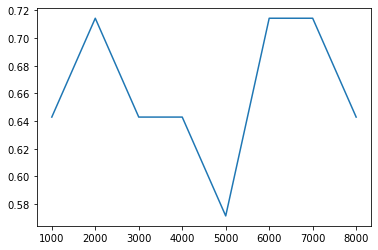

In [7]:
#accuracy as a function of shots
shots = []
accuracy = []

for i in range(1000, 9000, 1000):
    quantum_instance = QuantumInstance(backend, shots=i, seed_simulator=seed, seed_transpiler=seed)
    result = qsvm.run(quantum_instance)
    shots.append(i)
    accuracy.append(result["testing_accuracy"])
    print(i)

plt.plot(shots, accuracy)

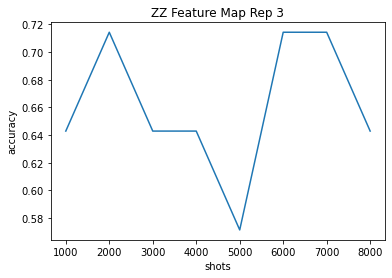

In [8]:
#plot, label, and save
plt.plot(shots, accuracy)
plt.xlabel("shots")
plt.ylabel("accuracy")
plt.title("__ Feature Map")
plt.savefig('__FeatureMap_accuracy.png')

Testing success ratio: 0.5714285714285714


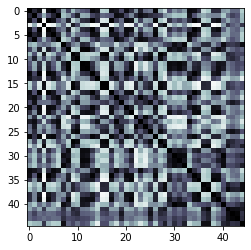

In [6]:
#one time test 
quantum_instance = QuantumInstance(backend, shots=2000, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')

#kernel matrix 
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');

Testing success ratio: 0.9285714285714286



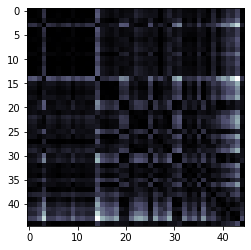

In [48]:
#classical SVM
from qiskit.aqua.algorithms import SklearnSVM

result = SklearnSVM(training_input, test_input).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()

kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r');